In [2]:
!pip install folium
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import requests
import ipaddress
from geopy.distance import geodesic
import folium
from folium import plugins


2025-10-05 18:25:18,324 INFO: Initializing external client
2025-10-05 18:25:18,325 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-10-05 18:25:20,374 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/398
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (27.53s) 
      t_id               cc_num  account_id  merchant_id  amount  \
0   209449  3083-7339-6048-6711  ACC_000942  MERCH_01282   79.06   
1  1147850  9160-4477-3883-4026  ACC_010601  MERCH_01473    8.98   
2    63946  2043-3604-6783-4696  ACC_020126  MERCH_02327  151.79   
3  1707310  1522-5016-9931-1616  ACC_013052  MERCH_03358  120.08   
4  1051610  6766-1562-4702-6603  ACC_036760  MERCH_02085  180.81   

        ip_address  card_present                        ts  cc_num_count  
0     55.2.116.250          True 2025-09-11 04:03:31+00:00            39  
1  153.241.106.180          True 2025-09-16 20:50:48+00:00            35  
2     81.121.87.54         False 2025-09-24 07:11:40+00:00            27  
3  235.198.232.241          True 2025-10-01 08:02:10+00:00            3

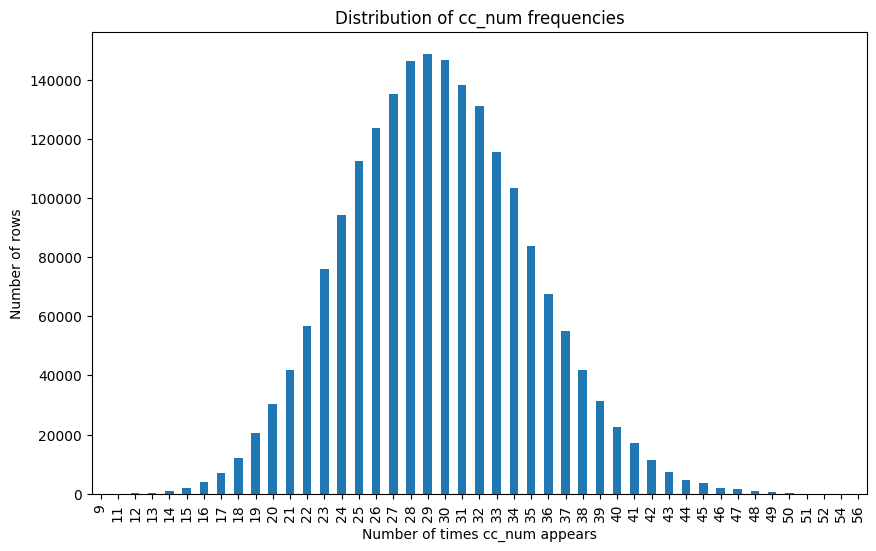

In [4]:
import hopsworks
import json

project = hopsworks.login()
fs = project.get_feature_store()

fg = fs.get_or_create_feature_group(name="credit_card_transactions", version=1)

df = fg.read()

# Example: assume your DataFrame is called df

# Compute the count of each cc_num
df["cc_num_count"] = df.groupby("cc_num")["cc_num"].transform("count")

# Check the result
print(df.head())

# Plot the distribution of counts
df["cc_num_count"].value_counts().sort_index().plot(kind="bar", figsize=(10,6))
plt.xlabel("Number of times cc_num appears")
plt.ylabel("Number of rows")
plt.title("Distribution of cc_num frequencies")
plt.show()


      t_id               cc_num  account_id  merchant_id  amount  \
0   209449  3083-7339-6048-6711  ACC_000942  MERCH_01282   79.06   
1  1147850  9160-4477-3883-4026  ACC_010601  MERCH_01473    8.98   
2    63946  2043-3604-6783-4696  ACC_020126  MERCH_02327  151.79   
3  1707310  1522-5016-9931-1616  ACC_013052  MERCH_03358  120.08   
4  1051610  6766-1562-4702-6603  ACC_036760  MERCH_02085  180.81   

        ip_address  card_present                        ts  cc_num_count  
0     55.2.116.250          True 2025-09-11 04:03:31+00:00            39  
1  153.241.106.180          True 2025-09-16 20:50:48+00:00            35  
2     81.121.87.54         False 2025-09-24 07:11:40+00:00            27  
3  235.198.232.241          True 2025-10-01 08:02:10+00:00            31  
4   196.157.26.224         False 2025-09-09 07:54:25+00:00            35  


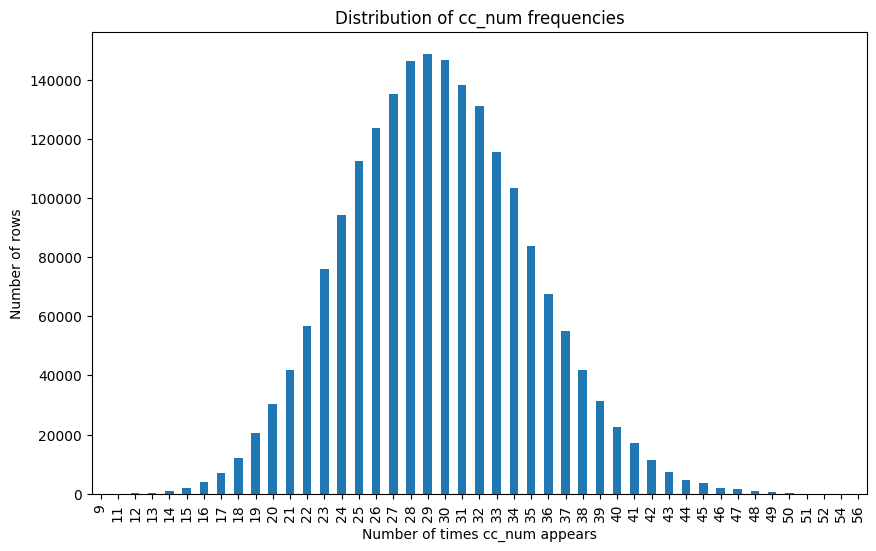

In [5]:

# Compute the count of each cc_num
df["cc_num_count"] = df.groupby("cc_num")["cc_num"].transform("count")

# Check the result
print(df.head())

# Plot the distribution of counts
df["cc_num_count"].value_counts().sort_index().plot(kind="bar", figsize=(10,6))
plt.xlabel("Number of times cc_num appears")
plt.ylabel("Number of rows")
plt.title("Distribution of cc_num frequencies")
plt.show()

Creating sample data for demonstration...
🚀 Starting Credit Card Transaction Analysis...
📊 BASIC DATA OVERVIEW
Dataset Shape: (1000, 7)
Date Range: 2023-01-01 00:00:00 to 2024-06-30 00:00:00
Unique Credit Cards: 100
Unique Merchants: 50

📈 COLUMN STATISTICS:
            amount                   ts
count  1000.000000                 1000
mean     35.486159  2023-10-01 00:00:00
min       1.025609  2023-01-01 00:00:00
25%      10.788708  2023-05-17 12:00:00
50%      20.085780  2023-10-01 00:00:00
75%      41.180782  2024-02-14 12:00:00
max     755.985570  2024-06-30 00:00:00
std      51.582260                  NaN

🏷️ DATA TYPES:
t_id                    object
cc_num                  object
merchant_id             object
amount                 float64
ip_address              object
card_present              bool
ts              datetime64[ns]
dtype: object

❌ MISSING VALUES:
Series([], dtype: int64)


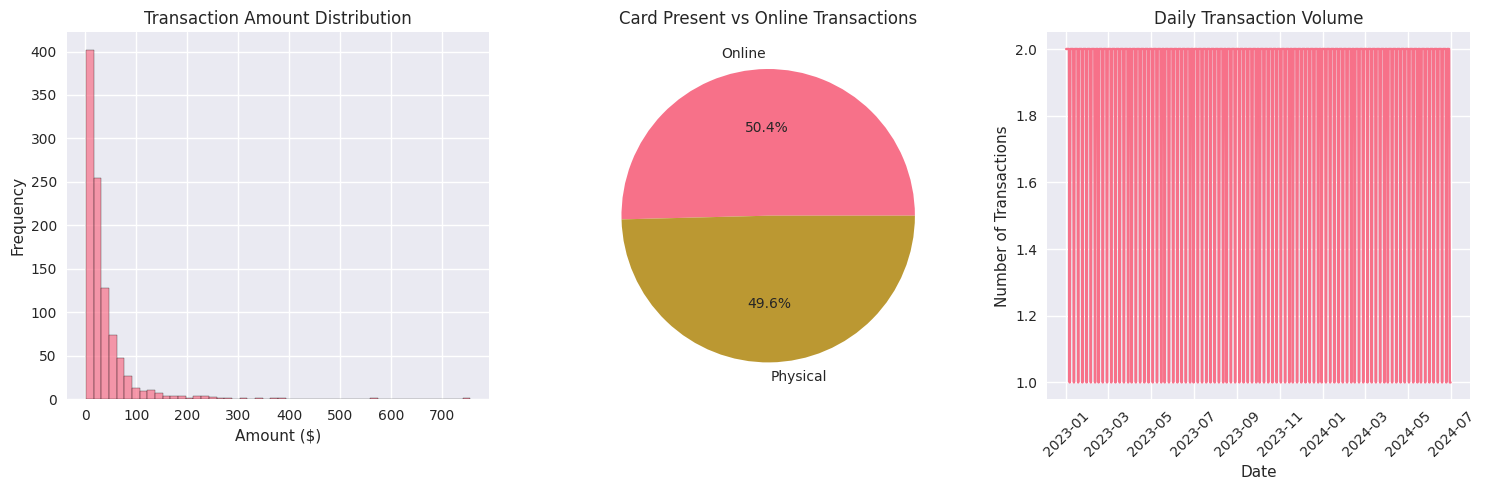

🔍 DETECTING CHAIN ATTACKS
🚨 Found 45 cards with suspicious chain patterns!

Top 10 most suspicious cards:
  cc_num  max_transactions_in_window  total_transactions  amount_spike_ratio  \
0  cc_13                           1                  10            4.300592   
1  cc_14                           1                  13            3.104945   
2  cc_15                           1                  10            5.898562   
3  cc_16                           1                  18            6.437431   
4  cc_17                           1                  14            4.285047   
5  cc_19                           1                  12            3.073369   
6   cc_2                           1                   8            4.739678   
7  cc_21                           1                  11            5.109626   
8  cc_22                           1                  12            4.295310   
9  cc_26                           1                   8            4.134093   

   total_amou

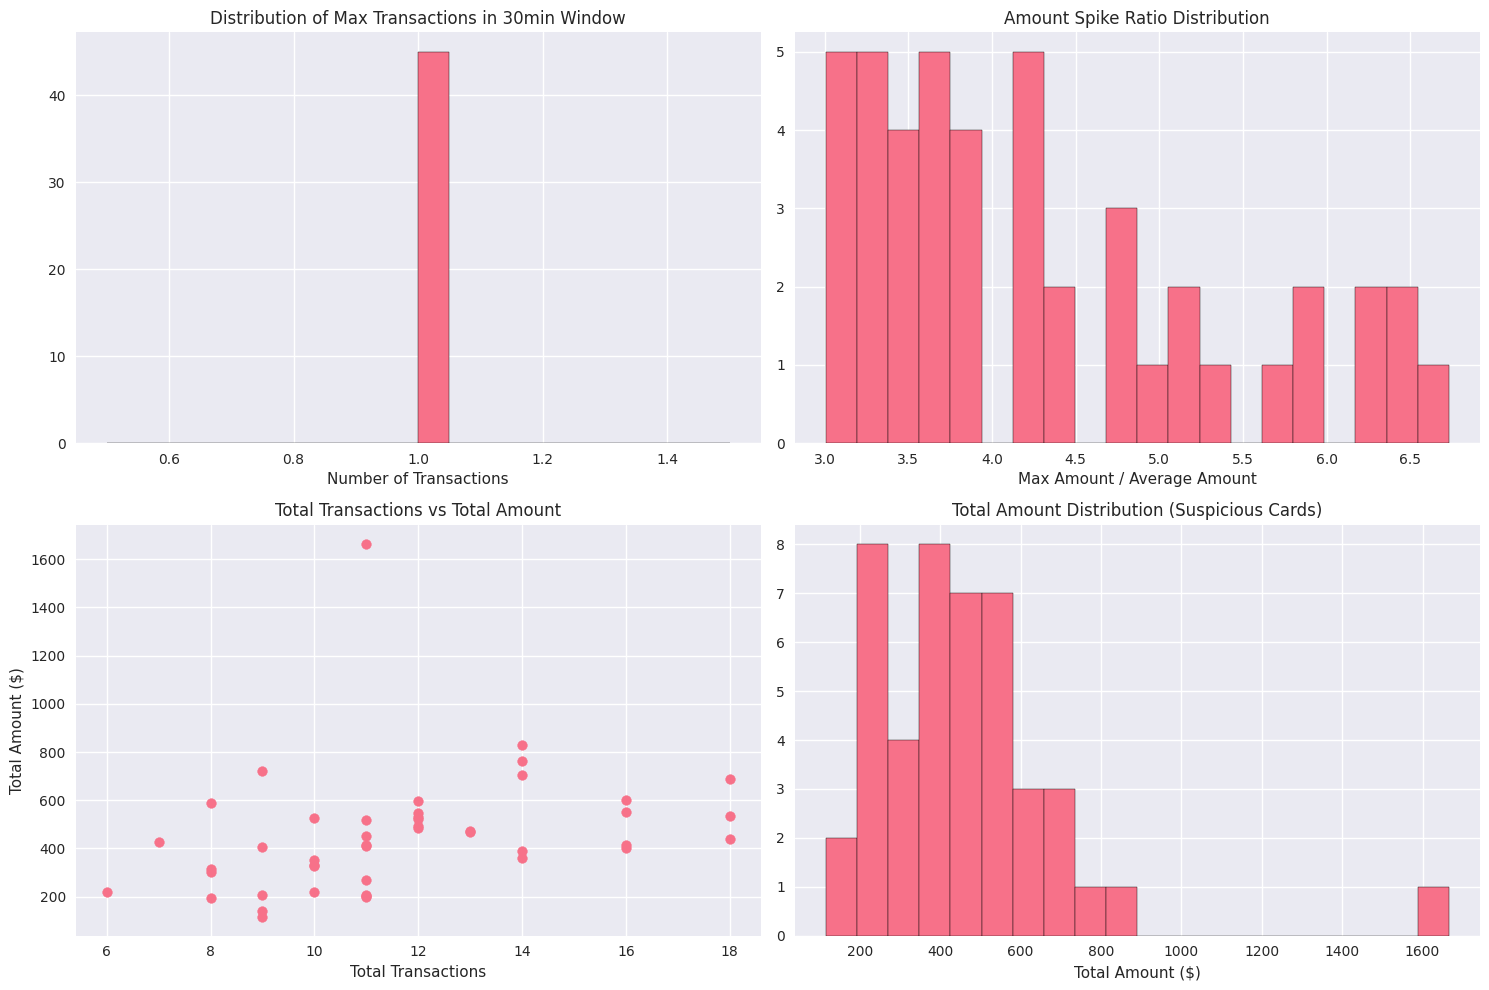

🌍 DETECTING GEOGRAPHIC ATTACKS
📍 Extracting locations from IP addresses...
📊 Analyzing 1000 transactions with location data
✅ No geographic attacks detected with current parameters

📋 FRAUD DETECTION SUMMARY REPORT
📊 Overall Statistics:
   • Total Transactions: 1,000
   • Total Amount: $35,486.16
   • Unique Credit Cards: 100
   • Average Transaction Amount: $35.49

🔗 Chain Attack Detection:
   • Suspicious Cards: 45
   • Percentage of Cards: 45.00%
   • Total Suspicious Amount: $20,526.82
   • Average Suspicious Amount per Card: $456.15

🌍 Geographic Attack Detection:
   • Suspicious Transaction Pairs: 0

💡 Recommendations:
   • Review cards with high transaction frequency in short time windows
   • Implement real-time velocity checks
   • Consider implementing machine learning models for anomaly detection
   • Set up real-time monitoring and alerts

✅ Analysis Complete!
💾 Results are stored in eda.suspicious_chains and eda.suspicious_geographic DataFrames


In [3]:

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class CreditCardEDA:
    def __init__(self):
        self.df = None
        self.suspicious_chains = None
        self.suspicious_geographic = None
        
    def load_data_from_hopsworks(self, feature_group_name="credit_card_transactions"):
        """
        Load data from Hopsworks feature store
        Replace this with your actual Hopsworks connection
        """
        try:
            # Example Hopsworks connection (adjust based on your setup)
            import hopsworks
            
            project = hopsworks.login()
            fs = project.get_feature_store()
            
            # Get the feature group
            fg = fs.get_feature_group(feature_group_name, version=1)
            
            # Read the data
            self.df = fg.read()
            
            print(f"✅ Successfully loaded {len(self.df)} rows from Hopsworks")
            return self.df
            
        except ImportError:
            print("❌ Hopsworks library not found. Please install with: pip install hopsworks")
            return None
        except Exception as e:
            print(f"❌ Error loading from Hopsworks: {e}")
            return None
    
    def load_data_from_csv(self, file_path):
        """Load data from CSV file"""
        try:
            self.df = pd.read_csv(file_path)
            self.df['ts'] = pd.to_datetime(self.df['ts'])
            print(f"✅ Successfully loaded {len(self.df)} rows from CSV")
            return self.df
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            return None
    
    def basic_eda(self):
        """Perform basic exploratory data analysis"""
        if self.df is None:
            print("❌ No data loaded. Please load data first.")
            return
        
        print("=" * 60)
        print("📊 BASIC DATA OVERVIEW")
        print("=" * 60)
        
        # Basic info
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Date Range: {self.df['ts'].min()} to {self.df['ts'].max()}")
        print(f"Unique Credit Cards: {self.df['cc_num'].nunique():,}")
        print(f"Unique Merchants: {self.df['merchant_id'].nunique():,}")
        
        print("\n📈 COLUMN STATISTICS:")
        print(self.df.describe())
        
        print("\n🏷️ DATA TYPES:")
        print(self.df.dtypes)
        
        print("\n❌ MISSING VALUES:")
        missing = self.df.isnull().sum()
        print(missing[missing > 0])
        
        # Transaction amount distribution
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.hist(self.df['amount'], bins=50, edgecolor='black', alpha=0.7)
        plt.title('Transaction Amount Distribution')
        plt.xlabel('Amount ($)')
        plt.ylabel('Frequency')
        
        plt.subplot(1, 3, 2)
        card_present_counts = self.df['card_present'].value_counts()
        plt.pie(card_present_counts.values, labels=['Online', 'Physical'] if card_present_counts.index[0] == False else ['Physical', 'Online'], 
                autopct='%1.1f%%')
        plt.title('Card Present vs Online Transactions')
        
        plt.subplot(1, 3, 3)
        daily_transactions = self.df.set_index('ts').resample('D').size()
        plt.plot(daily_transactions.index, daily_transactions.values)
        plt.title('Daily Transaction Volume')
        plt.xlabel('Date')
        plt.ylabel('Number of Transactions')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    def detect_chain_attacks(self, time_window_minutes=30, min_transactions=5, amount_threshold_multiplier=3):
        """
        Detect potential chain attacks - many transactions on the same card in a short time
        
        Parameters:
        - time_window_minutes: Time window to look for clustered transactions
        - min_transactions: Minimum number of transactions to consider suspicious
        - amount_threshold_multiplier: Flag if transaction amount is X times above card's average
        """
        print("=" * 60)
        print("🔍 DETECTING CHAIN ATTACKS")
        print("=" * 60)
        
        if self.df is None:
            print("❌ No data loaded")
            return None
        
        # Sort by card and timestamp
        df_sorted = self.df.sort_values(['cc_num', 'ts']).copy()
        
        # Calculate time differences between consecutive transactions for each card
        df_sorted['time_diff'] = df_sorted.groupby('cc_num')['ts'].diff()
        df_sorted['time_diff_minutes'] = df_sorted['time_diff'].dt.total_seconds() / 60
        
        # Calculate rolling transaction count within time window
        suspicious_cards = []
        
        for card_num in df_sorted['cc_num'].unique():
            card_data = df_sorted[df_sorted['cc_num'] == card_num].copy()
            
            if len(card_data) < min_transactions:
                continue
                
            # Find transactions within time window
            card_data = card_data.sort_values('ts')
            card_data['rolling_count'] = 0
            
            for i, row in card_data.iterrows():
                current_time = row['ts']
                window_start = current_time - timedelta(minutes=time_window_minutes)
                
                # Count transactions in time window
                window_transactions = card_data[
                    (card_data['ts'] >= window_start) & 
                    (card_data['ts'] <= current_time)
                ]
                
                card_data.loc[i, 'rolling_count'] = len(window_transactions)
            
            # Check for suspicious patterns
            max_rolling = card_data['rolling_count'].max()
            avg_amount = card_data['amount'].mean()
            max_amount = card_data['amount'].max()
            
            if (max_rolling >= min_transactions or 
                max_amount > avg_amount * amount_threshold_multiplier):
                
                suspicious_cards.append({
                    'cc_num': card_num,
                    'max_transactions_in_window': max_rolling,
                    'total_transactions': len(card_data),
                    'avg_amount': avg_amount,
                    'max_amount': max_amount,
                    'amount_spike_ratio': max_amount / avg_amount if avg_amount > 0 else 0,
                    'first_transaction': card_data['ts'].min(),
                    'last_transaction': card_data['ts'].max(),
                    'total_amount': card_data['amount'].sum()
                })
        
        self.suspicious_chains = pd.DataFrame(suspicious_cards)
        
        if len(self.suspicious_chains) > 0:
            print(f"🚨 Found {len(self.suspicious_chains)} cards with suspicious chain patterns!")
            print("\nTop 10 most suspicious cards:")
            print(self.suspicious_chains.nlargest(10, 'max_transactions_in_window')[
                ['cc_num', 'max_transactions_in_window', 'total_transactions', 'amount_spike_ratio', 'total_amount']
            ])
            
            # Plot distribution of suspicious activities
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            axes[0,0].hist(self.suspicious_chains['max_transactions_in_window'], bins=20, edgecolor='black')
            axes[0,0].set_title(f'Distribution of Max Transactions in {time_window_minutes}min Window')
            axes[0,0].set_xlabel('Number of Transactions')
            
            axes[0,1].hist(self.suspicious_chains['amount_spike_ratio'], bins=20, edgecolor='black')
            axes[0,1].set_title('Amount Spike Ratio Distribution')
            axes[0,1].set_xlabel('Max Amount / Average Amount')
            
            axes[1,0].scatter(self.suspicious_chains['total_transactions'], 
                             self.suspicious_chains['total_amount'])
            axes[1,0].set_title('Total Transactions vs Total Amount')
            axes[1,0].set_xlabel('Total Transactions')
            axes[1,0].set_ylabel('Total Amount ($)')
            
            axes[1,1].hist(self.suspicious_chains['total_amount'], bins=20, edgecolor='black')
            axes[1,1].set_title('Total Amount Distribution (Suspicious Cards)')
            axes[1,1].set_xlabel('Total Amount ($)')
            
            plt.tight_layout()
            plt.show()
        else:
            print("✅ No chain attacks detected with current parameters")
        
        return self.suspicious_chains
    
    def get_location_from_ip(self, ip_address):
        """
        Get approximate location from IP address using a free IP geolocation service
        Note: This is a simplified approach. In production, use a reliable IP geolocation service
        """
        try:
            # This is a mock function - replace with actual IP geolocation service
            # For demo purposes, we'll simulate locations based on IP ranges
            ip_parts = ip_address.split('.')
            
            # Simple simulation: create pseudo-locations based on IP
            lat = 40.7128 + (int(ip_parts[0]) % 20 - 10) * 0.1  # Around NYC ±1 degree
            lon = -74.0060 + (int(ip_parts[1]) % 20 - 10) * 0.1
            
            return lat, lon
        except:
            return None, None
    
    def detect_geographic_attacks(self, max_distance_km=100, max_time_minutes=60):
        """
        Detect geographic attacks - transactions on same card from locations too far apart in short time
        
        Parameters:
        - max_distance_km: Maximum reasonable distance between transactions
        - max_time_minutes: Time window to check for geographic impossibility
        """
        print("=" * 60)
        print("🌍 DETECTING GEOGRAPHIC ATTACKS")
        print("=" * 60)
        
        if self.df is None:
            print("❌ No data loaded")
            return None
        
        # Add location data based on IP addresses
        print("📍 Extracting locations from IP addresses...")
        locations = {}
        for ip in self.df['ip_address'].unique():
            lat, lon = self.get_location_from_ip(ip)
            if lat and lon:
                locations[ip] = (lat, lon)
        
        df_with_location = self.df.copy()
        df_with_location['lat'] = df_with_location['ip_address'].map(lambda x: locations.get(x, (None, None))[0])
        df_with_location['lon'] = df_with_location['ip_address'].map(lambda x: locations.get(x, (None, None))[1])
        
        # Remove transactions without location data
        df_with_location = df_with_location.dropna(subset=['lat', 'lon'])
        
        print(f"📊 Analyzing {len(df_with_location)} transactions with location data")
        
        # Sort by card and timestamp
        df_sorted = df_with_location.sort_values(['cc_num', 'ts']).copy()
        
        suspicious_geographic = []
        
        for card_num in df_sorted['cc_num'].unique():
            card_data = df_sorted[df_sorted['cc_num'] == card_num].copy()
            
            if len(card_data) < 2:
                continue
            
            # Check consecutive transactions for geographic impossibility
            for i in range(len(card_data) - 1):
                current_tx = card_data.iloc[i]
                next_tx = card_data.iloc[i + 1]
                
                # Calculate distance
                try:
                    distance = geodesic(
                        (current_tx['lat'], current_tx['lon']),
                        (next_tx['lat'], next_tx['lon'])
                    ).kilometers
                    
                    time_diff = (next_tx['ts'] - current_tx['ts']).total_seconds() / 60  # in minutes
                    
                    if distance > max_distance_km and time_diff < max_time_minutes:
                        suspicious_geographic.append({
                            'cc_num': card_num,
                            'tx1_id': current_tx['t_id'],
                            'tx2_id': next_tx['t_id'],
                            'distance_km': distance,
                            'time_diff_minutes': time_diff,
                            'tx1_ts': current_tx['ts'],
                            'tx2_ts': next_tx['ts'],
                            'tx1_amount': current_tx['amount'],
                            'tx2_amount': next_tx['amount'],
                            'tx1_location': (current_tx['lat'], current_tx['lon']),
                            'tx2_location': (next_tx['lat'], next_tx['lon']),
                            'tx1_ip': current_tx['ip_address'],
                            'tx2_ip': next_tx['ip_address'],
                            'speed_kmh': distance / (time_diff / 60) if time_diff > 0 else float('inf')
                        })
                except Exception as e:
                    continue
        
        self.suspicious_geographic = pd.DataFrame(suspicious_geographic)
        
        if len(self.suspicious_geographic) > 0:
            print(f"🚨 Found {len(self.suspicious_geographic)} suspicious geographic patterns!")
            print("\nTop 10 most suspicious geographic transactions:")
            print(self.suspicious_geographic.nlargest(10, 'speed_kmh')[
                ['cc_num', 'distance_km', 'time_diff_minutes', 'speed_kmh', 'tx1_amount', 'tx2_amount']
            ])
            
            # Visualizations
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            axes[0,0].hist(self.suspicious_geographic['distance_km'], bins=20, edgecolor='black')
            axes[0,0].set_title('Distance Distribution (Suspicious Transactions)')
            axes[0,0].set_xlabel('Distance (km)')
            
            axes[0,1].hist(self.suspicious_geographic['time_diff_minutes'], bins=20, edgecolor='black')
            axes[0,1].set_title('Time Difference Distribution')
            axes[0,1].set_xlabel('Time Difference (minutes)')
            
            axes[1,0].scatter(self.suspicious_geographic['time_diff_minutes'], 
                             self.suspicious_geographic['distance_km'])
            axes[1,0].set_title('Time vs Distance')
            axes[1,0].set_xlabel('Time Difference (minutes)')
            axes[1,0].set_ylabel('Distance (km)')
            
            # Speed histogram (capped at reasonable values for visualization)
            speed_data = self.suspicious_geographic['speed_kmh']
            speed_data_capped = speed_data[speed_data < 1000]  # Cap extreme values
            axes[1,1].hist(speed_data_capped, bins=20, edgecolor='black')
            axes[1,1].set_title('Required Speed Distribution (km/h)')
            axes[1,1].set_xlabel('Speed (km/h)')
            
            plt.tight_layout()
            plt.show()
        else:
            print("✅ No geographic attacks detected with current parameters")
        
        return self.suspicious_geographic
    
    def generate_summary_report(self):
        """Generate a comprehensive summary report"""
        print("\n" + "=" * 60)
        print("📋 FRAUD DETECTION SUMMARY REPORT")
        print("=" * 60)
        
        if self.df is None:
            print("❌ No data loaded")
            return
        
        total_transactions = len(self.df)
        total_amount = self.df['amount'].sum()
        unique_cards = self.df['cc_num'].nunique()
        
        print(f"📊 Overall Statistics:")
        print(f"   • Total Transactions: {total_transactions:,}")
        print(f"   • Total Amount: ${total_amount:,.2f}")
        print(f"   • Unique Credit Cards: {unique_cards:,}")
        print(f"   • Average Transaction Amount: ${self.df['amount'].mean():.2f}")
        
        if self.suspicious_chains is not None:
            chain_attacks = len(self.suspicious_chains)
            chain_percentage = (chain_attacks / unique_cards) * 100
            print(f"\n🔗 Chain Attack Detection:")
            print(f"   • Suspicious Cards: {chain_attacks}")
            print(f"   • Percentage of Cards: {chain_percentage:.2f}%")
            
            if chain_attacks > 0:
                total_suspicious_amount = self.suspicious_chains['total_amount'].sum()
                print(f"   • Total Suspicious Amount: ${total_suspicious_amount:,.2f}")
                print(f"   • Average Suspicious Amount per Card: ${total_suspicious_amount/chain_attacks:,.2f}")
        
        if self.suspicious_geographic is not None:
            geo_attacks = len(self.suspicious_geographic)
            print(f"\n🌍 Geographic Attack Detection:")
            print(f"   • Suspicious Transaction Pairs: {geo_attacks}")
            
            if geo_attacks > 0:
                avg_distance = self.suspicious_geographic['distance_km'].mean()
                avg_time = self.suspicious_geographic['time_diff_minutes'].mean()
                avg_speed = self.suspicious_geographic['speed_kmh'].median()  # Use median for speed
                print(f"   • Average Distance: {avg_distance:.1f} km")
                print(f"   • Average Time Difference: {avg_time:.1f} minutes")
                print(f"   • Median Required Speed: {avg_speed:.1f} km/h")
        
        print(f"\n💡 Recommendations:")
        if self.suspicious_chains is not None and len(self.suspicious_chains) > 0:
            print("   • Review cards with high transaction frequency in short time windows")
            print("   • Implement real-time velocity checks")
        
        if self.suspicious_geographic is not None and len(self.suspicious_geographic) > 0:
            print("   • Review geographically impossible transactions")
            print("   • Implement location-based fraud detection")
        
        print("   • Consider implementing machine learning models for anomaly detection")
        print("   • Set up real-time monitoring and alerts")

# Usage Example
if __name__ == "__main__":
    # Initialize the EDA class
    eda = CreditCardEDA()
    
    # Method 1: Load from Hopsworks (uncomment if you have Hopsworks setup)
    # eda.load_data_from_hopsworks("credit_card_transactions")
    
    # Method 2: Load from CSV (if you export the data)
    # eda.load_data_from_csv("credit_card_transactions.csv")
    
    # Method 3: Create sample data for demonstration
    print("Creating sample data for demonstration...")
    sample_data = {
        't_id': [f'tx_{i}' for i in range(1000)],
        'cc_num': np.random.choice([f'cc_{i}' for i in range(100)], 1000),
        'merchant_id': np.random.choice([f'merchant_{i}' for i in range(50)], 1000),
        'amount': np.random.lognormal(3, 1, 1000),
        'ip_address': [f'{np.random.randint(1,255)}.{np.random.randint(1,255)}.{np.random.randint(1,255)}.{np.random.randint(1,255)}' for _ in range(1000)],
        'card_present': np.random.choice([True, False], 1000),
        'ts': pd.date_range(start='2023-01-01', end='2024-06-30', periods=1000)
    }
    
    eda.df = pd.DataFrame(sample_data)
    
    # Perform the analysis
    print("🚀 Starting Credit Card Transaction Analysis...")
    
    # Basic EDA
    eda.basic_eda()
    
    # Detect chain attacks
    chain_results = eda.detect_chain_attacks(
        time_window_minutes=30, 
        min_transactions=5, 
        amount_threshold_multiplier=3
    )
    
    # Detect geographic attacks
    geo_results = eda.detect_geographic_attacks(
        max_distance_km=100, 
        max_time_minutes=60
    )
    
    # Generate summary report
    eda.generate_summary_report()
    
    print("\n✅ Analysis Complete!")
    print("💾 Results are stored in eda.suspicious_chains and eda.suspicious_geographic DataFrames")